<a href="https://colab.research.google.com/github/AviFeygin/EECS-4080/blob/main/Israpol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-lego

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
pip install lowess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for lowess: filename=lowess-1.0.3-py3-none-any.whl size=6189 sha256=57b153bfbe4c44dc70c711412601d10fb799407bdaabbddb16d8386c462bf171
  Stored in directory: /root/.cache/pip/wheels/4b/27/85/f993ff067a0849a40fba7af7dd5b16b501585f0be0587cfb8b
Successfully built lowess


In [3]:
import numpy
import torch
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import keras as ker
import seaborn as sea
import xlrd as xlr
import numpy as np
import matplotlib.pyplot as plt
# import pymc3 as pm
# import theano
import statsmodels.api as stm

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#ignore all warnings
import warnings
warnings.filterwarnings('ignore')
sea.set()

import itertools
!pip install --upgrade xlrd

from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.max_columns = 30
from vega_datasets import data

verbose = 0

import statsmodels.api as sm # to build a LOWESS model
from scipy.interpolate import interp1d # for interpolation of new data points

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading Text

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = '/content/drive/MyDrive/Polls.xls'
polls = pd.read_excel(data)
polls_2021 = pd.read_excel(data, sheet_name=0, index_col=0)
display(polls)
election_results = polls[polls['Polling firm'] == 'Election results[5]']

,Date,Polling firm,Publisher,Poll Size,Margin of Error,Days Before election,Likud,Yesh Atid,Blue & White,Joint List,...,Raam,Yamina,New Hope,Labor,Religious Zionist,NEP,Right Wing,Left Wing,religious,Arab
0,2021-03-23 00:00:01,Election results[5],NaN,NaN,0.0,0.000000,30,17,8.0,6,...,4.0,7,6,7.00,6.00,0.00,56.00,32.00,16,16.0
1,2021-03-20 00:00:02,Smith,Mako[12],900.0,3.1,2.999988,31,19,4.0,8,...,4.0,9,9,5.00,5.00,1.68,61.00,28.00,15,16.0
2,2021-03-19 00:00:03,Camil Fuchs,Channel 13[7],1103.0,3.4,3.999977,30,18,4.0,8,...,4.0,10,10,6.00,5.00,0.00,61.00,28.00,15,16.0
3,2021-03-19 00:00:04,Midgam/iPanel,Channel 12[8],1000.0,3.1,3.999965,32,18,4.0,8,...,4.0,9,9,6.00,4.00,1.56,61.00,28.00,15,16.0
4,2021-03-19 00:00:05,Kantar,Kan 11[11],1406.0,2.6,3.999954,31,19,4.0,8,...,4.0,9,9,5.00,5.00,1.68,61.00,28.00,15,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2020-06-17 00:02:35,Direct Polls,–[189],NaN,NaN,278.998218,41,15,11.0,16,...,0.0,7,0,1.32,0.60,0.00,56.60,27.32,17,21.0
155,2020-06-17 00:02:36,Smith,The Jerusalem Post[190],NaN,NaN,278.998206,41,15,10.0,16,...,0.0,8,0,2.76,1.68,0.00,58.68,27.76,16,22.0
156,2020-06-11 00:02:37,Maagar Mohot,103fm[191],NaN,NaN,284.998194,41,16,13.0,15,...,0.0,6,0,0.00,0.00,0.00,54.00,29.00,17,20.0
157,2020-06-08 00:02:38,Midgam,Channel 12[192],NaN,NaN,287.998183,40,14,12.0,15,...,0.0,8,0,2.28,0.48,0.00,57.48,28.28,16,21.0


In [6]:
display(election_results)

,Date,Polling firm,Publisher,Poll Size,Margin of Error,Days Before election,Likud,Yesh Atid,Blue & White,Joint List,...,Raam,Yamina,New Hope,Labor,Religious Zionist,NEP,Right Wing,Left Wing,religious,Arab
0,2021-03-23 00:00:01,Election results[5],NaN,NaN,0.0,0.0,30,17,8.0,6,...,4.0,7,6,7.0,6.0,0.0,56.0,32.0,16,16.0


In [7]:
polls['Polling firm'].unique()

array(['Election results[5]', 'Smith', 'Camil Fuchs', 'Midgam/iPanel',
       'Kantar', 'Panels Politics', 'Direct Polls', 'Maagar Mohot',
       'Geocartographia', 'Midgam'], dtype=object)

In [8]:
print("polls_2021 shape:")
print(polls_2021.shape)
just_polls = polls_2021.iloc[1:161, 4:25]
print("just polls")

#fixing the float errors
just_polls['Days Before election'] = just_polls['Days Before election'].round().astype('int')

number_of_parties = 14
number_of_blocs = 4

polls_2021 shape:
(159, 23)
just polls


In [9]:
display(just_polls)

,Days Before election,Likud,Yesh Atid,Blue & White,Joint List,Shas,UTJ,Yisrael Beiteinu,Meretz,Raam,Yamina,New Hope,Labor,Religious Zionist,NEP,Right Wing,Left Wing,religious,Arab
Date,,,,,,,,,,,,,,,,,,,
2021-03-20 00:00:02,3,31,19,4.0,8,8,7,7,4.0,4.0,9,9,5.00,5.00,1.68,61.00,28.00,15,16.0
2021-03-19 00:00:03,4,30,18,4.0,8,8,7,6,4.0,4.0,10,10,6.00,5.00,0.00,61.00,28.00,15,16.0
2021-03-19 00:00:04,4,32,18,4.0,8,8,7,7,4.0,4.0,9,9,6.00,4.00,1.56,61.00,28.00,15,16.0
2021-03-19 00:00:05,4,31,19,4.0,8,8,7,7,4.0,4.0,9,9,5.00,5.00,1.68,61.00,28.00,15,16.0
2021-03-18 00:00:06,5,30,19,5.0,8,8,6,8,4.0,4.0,10,8,5.00,5.00,0.00,61.00,29.00,14,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 00:02:35,279,41,15,11.0,16,10,7,8,5.0,0.0,7,0,1.32,0.60,0.00,56.60,27.32,17,21.0
2020-06-17 00:02:36,279,41,15,10.0,16,9,7,8,6.0,0.0,8,0,2.76,1.68,0.00,58.68,27.76,16,22.0
2020-06-11 00:02:37,285,41,16,13.0,15,9,8,7,5.0,0.0,6,0,0.00,0.00,0.00,54.00,29.00,17,20.0


Parties

Additional Blocs

In [10]:
just_polls['anti bibi'] = just_polls['Yesh Atid']+just_polls['Blue & White']+just_polls['Joint List']+just_polls['Yisrael Beiteinu']+ just_polls['Meretz']+just_polls['Raam']+just_polls['Yamina']+ just_polls['New Hope']+just_polls['Labor']
just_polls['pro bibi'] = just_polls[['Likud','Shas', 'UTJ', 'Religious Zionist']].sum(axis=1)
just_polls['current gov'] = just_polls['Yesh Atid']+just_polls['Blue & White']+just_polls['Yisrael Beiteinu']+ just_polls['Meretz']+just_polls['Raam']+just_polls['Yamina']+ just_polls['New Hope']+just_polls['Labor']

In [11]:
display(just_polls['pro bibi'])

Date
2021-03-20 00:00:02    51.00
2021-03-19 00:00:03    50.00
2021-03-19 00:00:04    51.00
2021-03-19 00:00:05    51.00
2021-03-18 00:00:06    49.00
                       ...  
2020-06-17 00:02:35    58.60
2020-06-17 00:02:36    58.68
2020-06-11 00:02:37    58.00
2020-06-08 00:02:38    56.48
2020-05-26 00:02:39    59.56
Name: pro bibi, Length: 158, dtype: float64

In [12]:
Smith = polls[polls['Polling firm']== 'Smith']
Camil_Fuchs = polls[polls['Polling firm']== 'Camil Fuchs']
Midgam_iPanel = polls[polls['Polling firm']== 'Midgam/iPanel']
Kantar = polls[polls['Polling firm']== 'Kantar']
Panels_Politics = polls[polls['Polling firm']== 'Panels Politics']
Direct_Polls = polls[polls['Polling firm']== 'Direct Polls']
Maagar_Mohot = polls[polls['Polling firm']== 'Maagar Mohot']
Geocartographia = polls[polls['Polling firm']== 'Geocartographia']
Midgam = polls[polls['Polling firm']== 'Migdam']

In [13]:
likud = just_polls[['Days Before election','Likud']]
#display(likud)
yesh_atid = just_polls[['Days Before election','Yesh Atid']]
blue_and_white = just_polls[['Days Before election','Blue & White']]
joint_list = just_polls[['Days Before election','Joint List']]
shas = just_polls[['Days Before election','Shas']]
utj = just_polls[['Days Before election','UTJ']]
beiteinu = just_polls[['Days Before election','Yisrael Beiteinu']]
meretz = just_polls[['Days Before election','Meretz']]
raam = just_polls[['Days Before election','Raam']]
yamina = just_polls[['Days Before election','Yamina']]
new_hope = just_polls[['Days Before election','New Hope']]
Labor = just_polls[['Days Before election','Labor']]
religious_zionist = just_polls[['Days Before election','Religious Zionist']]



Blocs


In [14]:
right_wing  = just_polls[['Days Before election','Right Wing']]
left_wing   = just_polls[['Days Before election','Left Wing']]
religious   = just_polls[['Days Before election','religious']]
arab        = just_polls[['Days Before election','Arab']]
anti_bibi   = just_polls[['Days Before election','anti bibi']]
pro_bibi    = just_polls[['Days Before election','pro bibi']]
current_gov = just_polls[['Days Before election','current gov']]

Defining a LOESS function
it will take in a panda frame column and return the loess column

In [15]:
#Frame must be a column dataframe with time indexing, delta is an integer that should be the time interval and days which is unique days of the set
#returns new frame with loess and same time indexing
# freame.loc[frame['set_of_numbers'] <= 4, 'equal_or_lower_than_4?'] = 'True' 
# frame.loc[frame['set_of_numbers'] > 4, 'equal_or_lower_than_4?'] = 'False' 
verbose =0
just_polls['Days Before election'].nunique()
def LOESS(frame, delta = 2, days = 1, name = 'Likud'):
  display(frame.shape)
  delta = (delta-1)/2
  length = len(frame.index)
  Loess_frame = pd.DataFrame()
  temp = pd.DataFrame()
  #above_35 = titanic[titanic["Age"] > 35]
  for i in range(3, frame['Days Before election'].max()):
   temp = frame[(frame['Days Before election'] <= (i+delta)) & (frame['Days Before election'] >= (i-delta)) ]
   if len(temp.index)>0:
    x = temp['Days Before election'].values.reshape(-1,1)
 
    y = temp[name].values.reshape(len(temp.index),1)

    if (verbose == 1):
       print("i: ")
       display(i)
       print("y: ")
       display(y)
       print("x: ")
       display(x)


    model = linear_model.LinearRegression().fit(x, y)
    linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    if verbose ==1:
     display(model.predict([[i]]))
    Loess_frame.append([i, model.predict([[i]])])
    if verbose ==1:
     display(Loess_frame)
  return Loess_frame





In [16]:
verbose = 0
delta = 3
likud_Loess             = LOESS(likud, delta, just_polls['Days Before election'].nunique(), 'Likud')
yesh_atid_Loess         = LOESS(yesh_atid, delta, just_polls['Days Before election'].nunique(), 'Yesh Atid')
blue_and_white_Loess    = LOESS(blue_and_white,delta, just_polls['Days Before election'].nunique(), 'Blue & White')
joint_list_Loess        = LOESS(joint_list, delta ,just_polls['Days Before election'].nunique(), 'Joint List')
shas_Loess              = LOESS(shas, delta, just_polls['Days Before election'].nunique(), 'Shas')
utj_Loess               = LOESS(utj, delta, just_polls['Days Before election'].nunique(), 'UTJ')
beiteinu_Loess          = LOESS(beiteinu, delta, just_polls['Days Before election'].nunique(), 'Yisrael Beiteinu')
meretz_Loess            = LOESS(meretz, delta, just_polls['Days Before election'].nunique(), 'Meretz')
raam_Loess              = LOESS(raam, delta, just_polls['Days Before election'].nunique(), 'Raam')
yamina_Loess            = LOESS(yamina, delta, just_polls['Days Before election'].nunique(), 'Yamina')
new_hope_Loess          = LOESS(new_hope, delta, just_polls['Days Before election'].nunique(), 'New Hope')
Labor_Loess             = LOESS(Labor, delta, just_polls['Days Before election'].nunique(), 'Labor')
religious_zionist_Loess = LOESS(religious_zionist, delta, just_polls['Days Before election'].nunique(), 'Religious Zionist')

(158, 2)

(158, 2)

(158, 2)

(158, 2)

(158, 2)

(158, 2)

(158, 2)

(158, 2)

(158, 2)

(158, 2)

(158, 2)

(158, 2)

(158, 2)

In [17]:
right_wing_Loess = LOESS(right_wing, delta, just_polls['Days Before election'].nunique(),'Right Wing')
left_wing_Loess  = LOESS(left_wing, delta, just_polls['Days Before election'].nunique(),'Left Wing')
religious_Loess  = LOESS(religious, delta, just_polls['Days Before election'].nunique(),'religious')
anti_bibi_Loess   = LOESS(anti_bibi, delta,just_polls['Days Before election'].nunique(),'anti bibi')
pro_bibi_Loess    = LOESS(pro_bibi, delta,just_polls['Days Before election'].nunique(),'pro bibi')
current_gov_Loess = LOESS(current_gov, delta,just_polls['Days Before election'].nunique(),'current gov')

(158, 2)

(158, 2)

(158, 2)

(158, 2)

(158, 2)

(158, 2)

Defining the LOWESS function

In [18]:
#Frame must be a column dataframe with time indexing, delta is an integer that should be the time interval and days which is unique days of the set
#returns new frame with loess and same time indexing
# freame.loc[frame['set_of_numbers'] <= 4, 'equal_or_lower_than_4?'] = 'True' 
# frame.loc[frame['set_of_numbers'] > 4, 'equal_or_lower_than_4?'] = 'False' 
verbose =0
just_polls['Days Before election'].nunique()
def LOWESS(frame, delta = 2, days = 1, name = 'Likud'):
  display(frame.shape)
  delta = (delta-1)/2
  length = len(frame.index)
  Loess_frame = pd.DataFrame()
  temp = pd.DataFrame()
  #above_35 = titanic[titanic["Age"] > 35]
  for i in range(3, frame['Days Before election'].max()):
   temp = frame[(frame['Days Before election'] <= (i+delta)) & (frame['Days Before election'] >= (i-delta)) ]
   if len(temp.index)>0:
    x = temp['Days Before election'].values.reshape(-1,1)
 
    y = temp[name].values.reshape(len(temp.index),1)

    if (verbose == 1):
       print("i: ")
       display(i)
       print("y: ")
       display(y)
       print("x: ")
       display(x)


    model = linear_model.LinearRegression().fit(x, y)
    linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    if verbose ==1:
     display(model.predict([[i]]))
    Loess_frame.append([i, model.predict([[i]])])
    if verbose ==1:
     display(Loess_frame)
  return Loess_frame







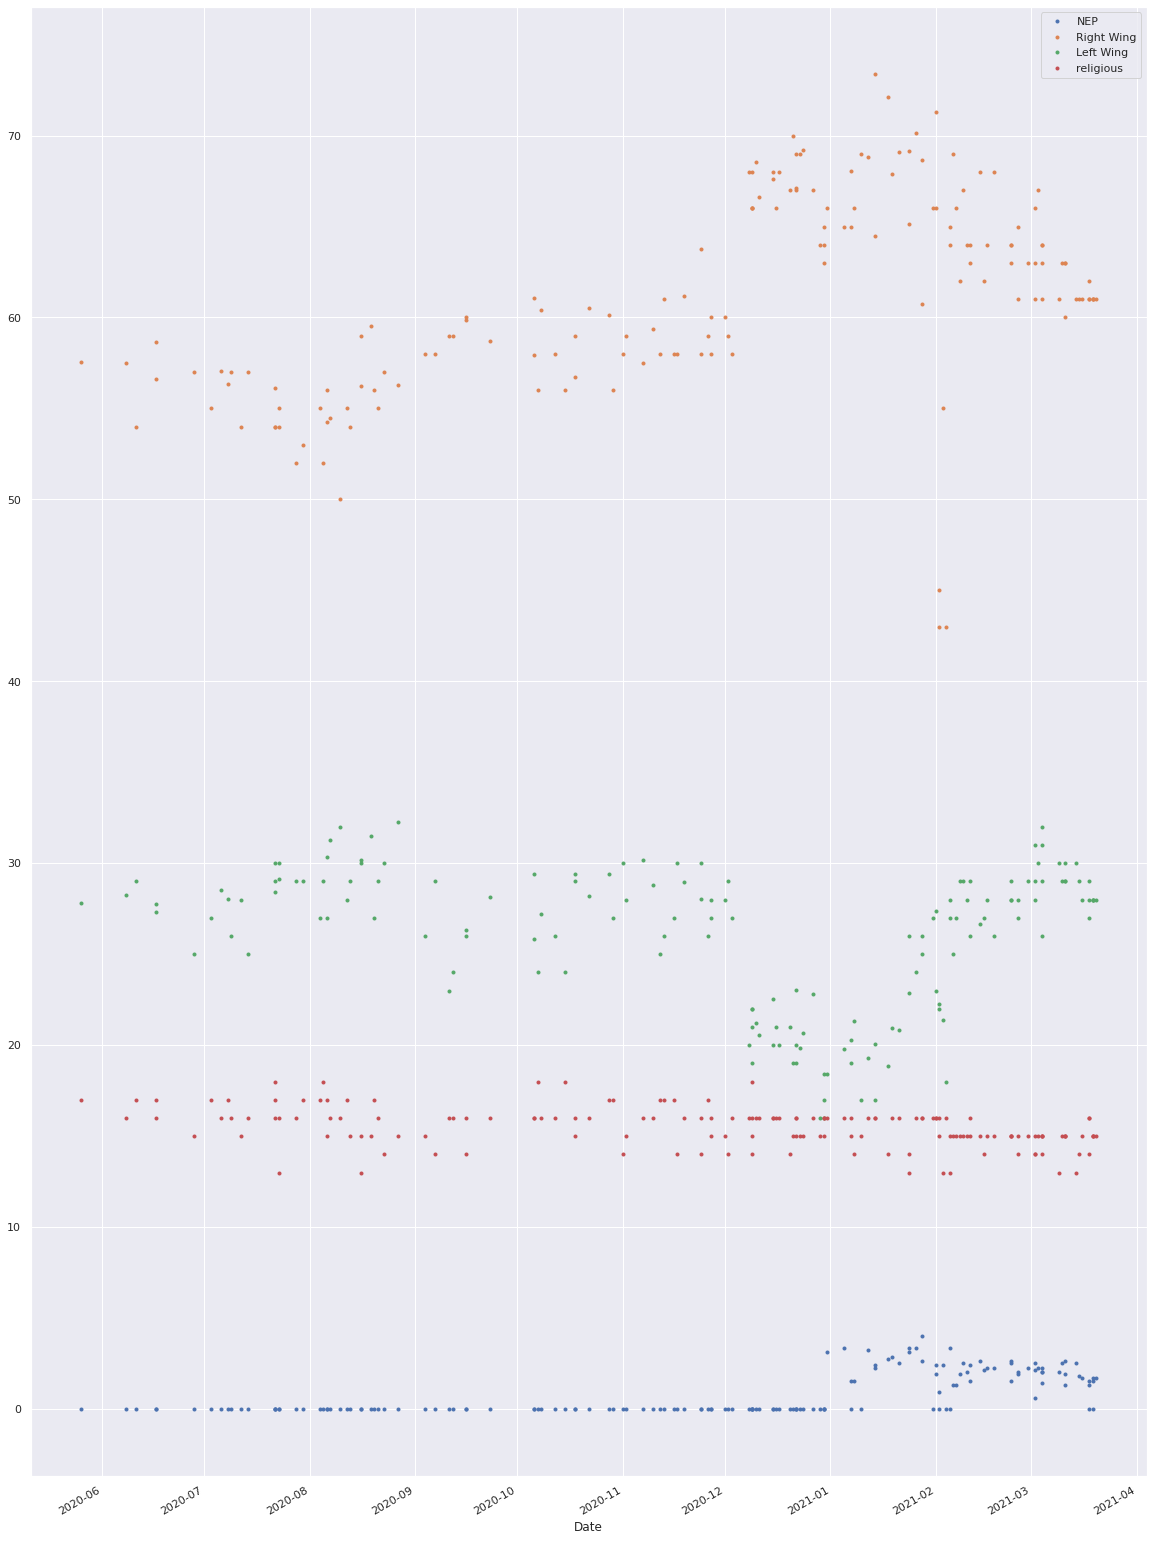

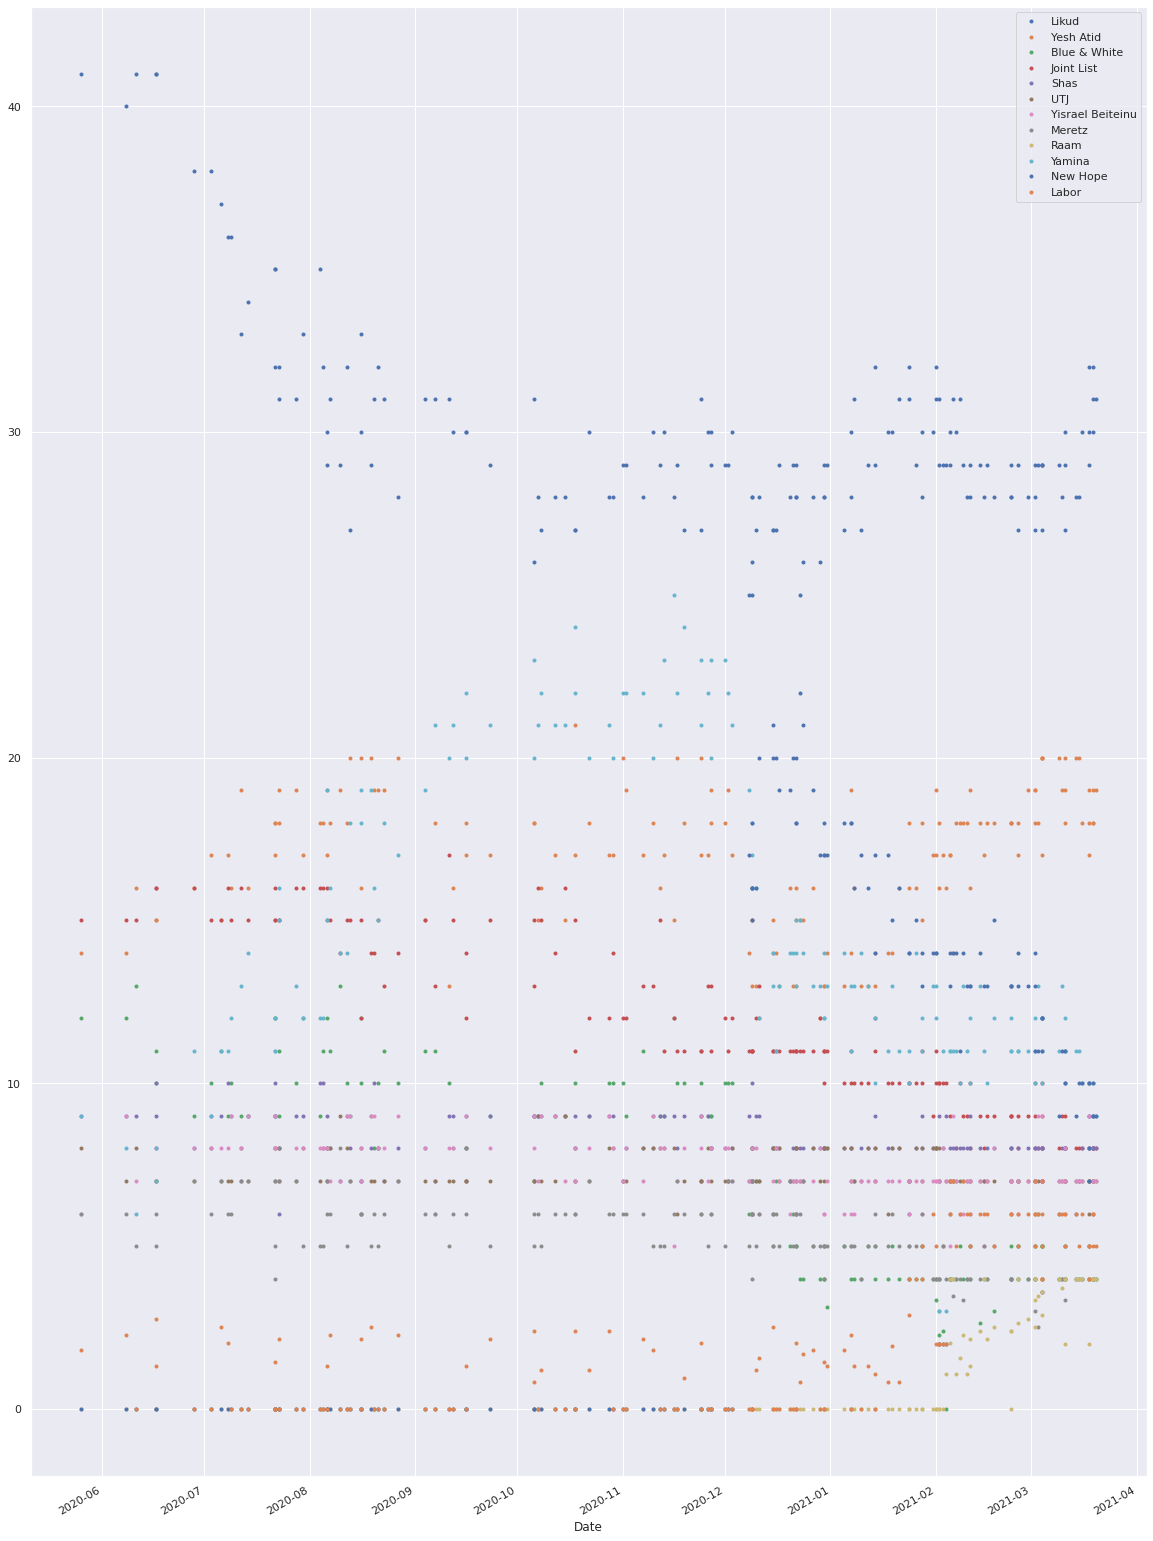

In [19]:
just_polls_parties = just_polls.iloc[:, 0:13]
just_polls_blocks = just_polls.iloc[:,14:18]
#[:,-1] rows and columns
just_polls_blocks.plot(figsize=(20, 30, ), style =".")
just_polls_parties.drop(['Days Before election'], axis = 1).plot(figsize=(20,30), style = ".")

In [20]:
display(just_polls_parties)

,Days Before election,Likud,Yesh Atid,Blue & White,Joint List,Shas,UTJ,Yisrael Beiteinu,Meretz,Raam,Yamina,New Hope,Labor
Date,,,,,,,,,,,,,
2021-03-20 00:00:02,3,31,19,4.0,8,8,7,7,4.0,4.0,9,9,5.00
2021-03-19 00:00:03,4,30,18,4.0,8,8,7,6,4.0,4.0,10,10,6.00
2021-03-19 00:00:04,4,32,18,4.0,8,8,7,7,4.0,4.0,9,9,6.00
2021-03-19 00:00:05,4,31,19,4.0,8,8,7,7,4.0,4.0,9,9,5.00
2021-03-18 00:00:06,5,30,19,5.0,8,8,6,8,4.0,4.0,10,8,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 00:02:35,279,41,15,11.0,16,10,7,8,5.0,0.0,7,0,1.32
2020-06-17 00:02:36,279,41,15,10.0,16,9,7,8,6.0,0.0,8,0,2.76
2020-06-11 00:02:37,285,41,16,13.0,15,9,8,7,5.0,0.0,6,0,0.00


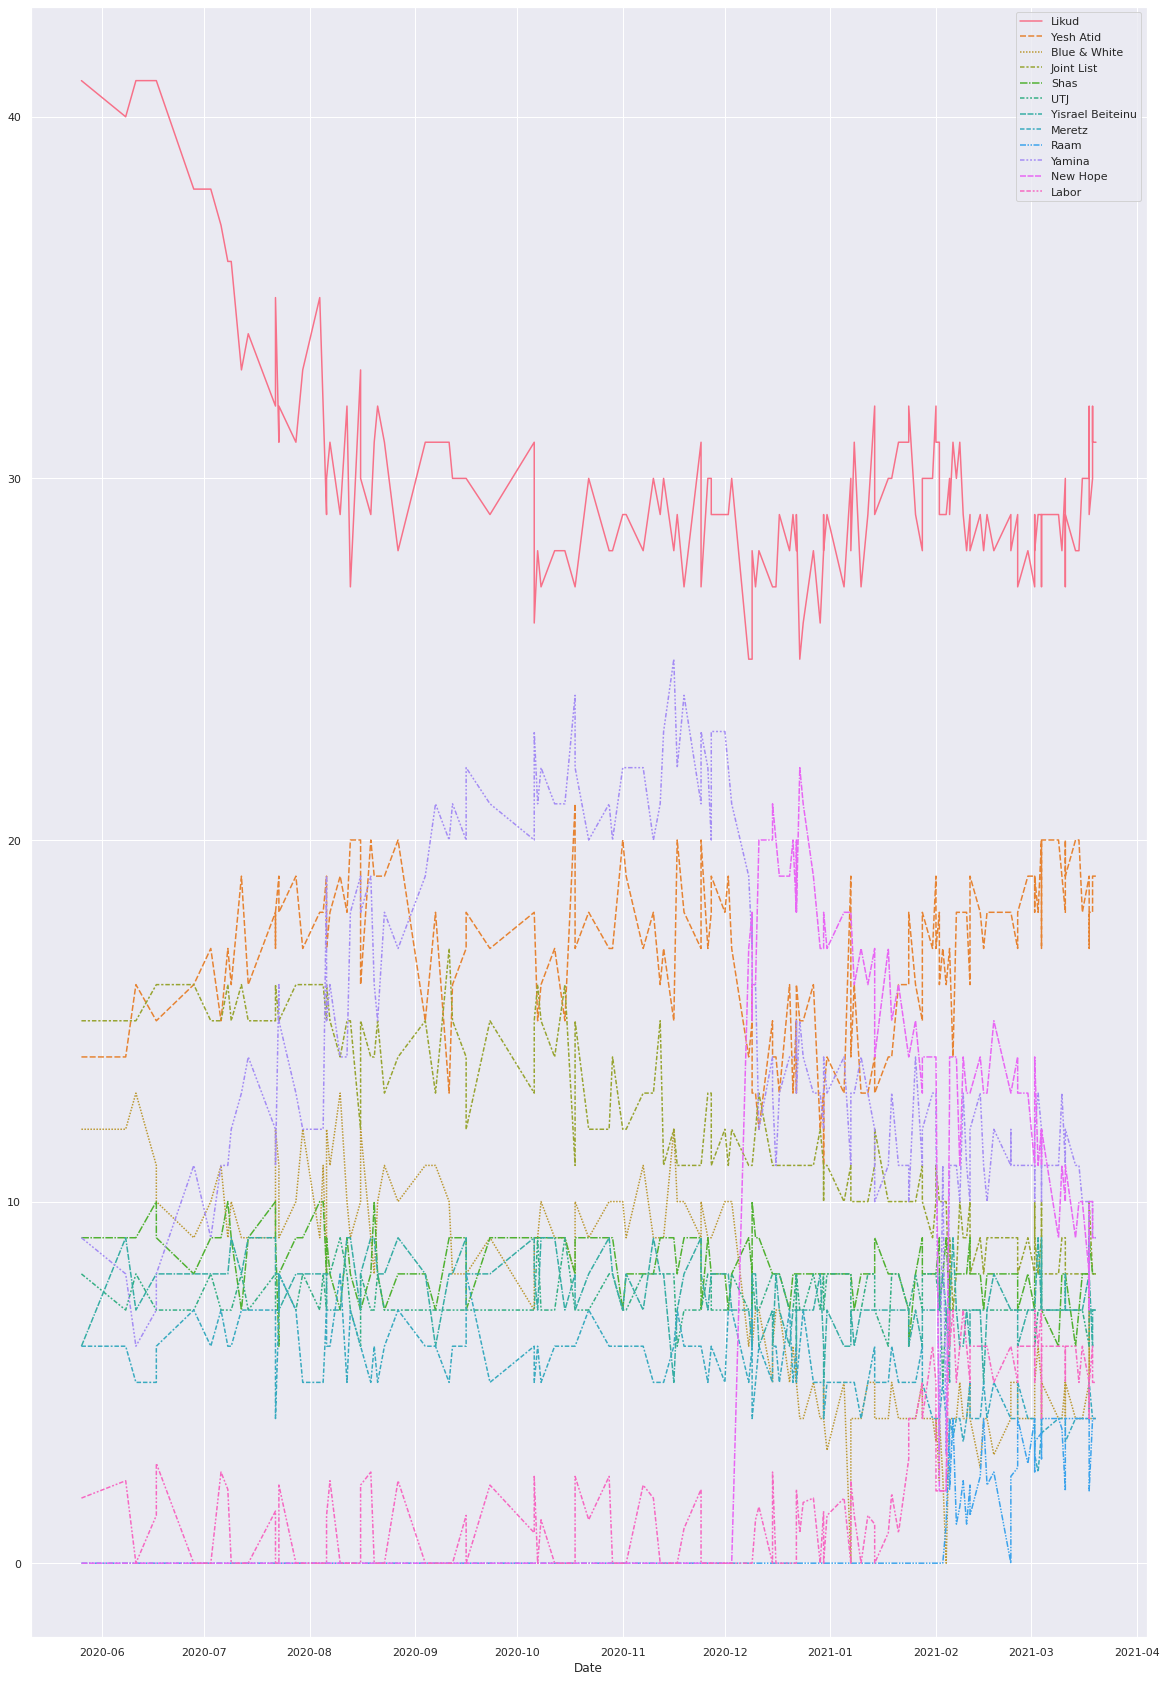

In [21]:
fig, ax = plt.subplots(figsize=(20,30))
sea.lineplot(data = just_polls_parties.drop('Days Before election', axis =1 ),ci="sd")

In [35]:
from statsmodels.nonparametric.smoothers_lowess import lowess

def make_lowess(series):
    endog = series.values
    exog = series.index.values

    smooth = lowess(endog, exog)
    index, data = np.transpose(smooth)

    return pd.Series(data, index=pd.to_datetime(index)) 

In [37]:
Likud_Lowess = make_lowess(just_polls_parties.Likud)
display(Likud_Lowess)

2020-05-26 00:02:39    36.994313
2020-06-08 00:02:38    36.168104
2020-06-11 00:02:37    35.981273
2020-06-17 00:02:35    35.612054
2020-06-17 00:02:36    35.612053
                         ...    
2021-03-18 00:00:08    29.375546
2021-03-19 00:00:03    29.383282
2021-03-19 00:00:04    29.383283
2021-03-19 00:00:05    29.383283
2021-03-20 00:00:02    29.390976
Length: 158, dtype: float64

covariance


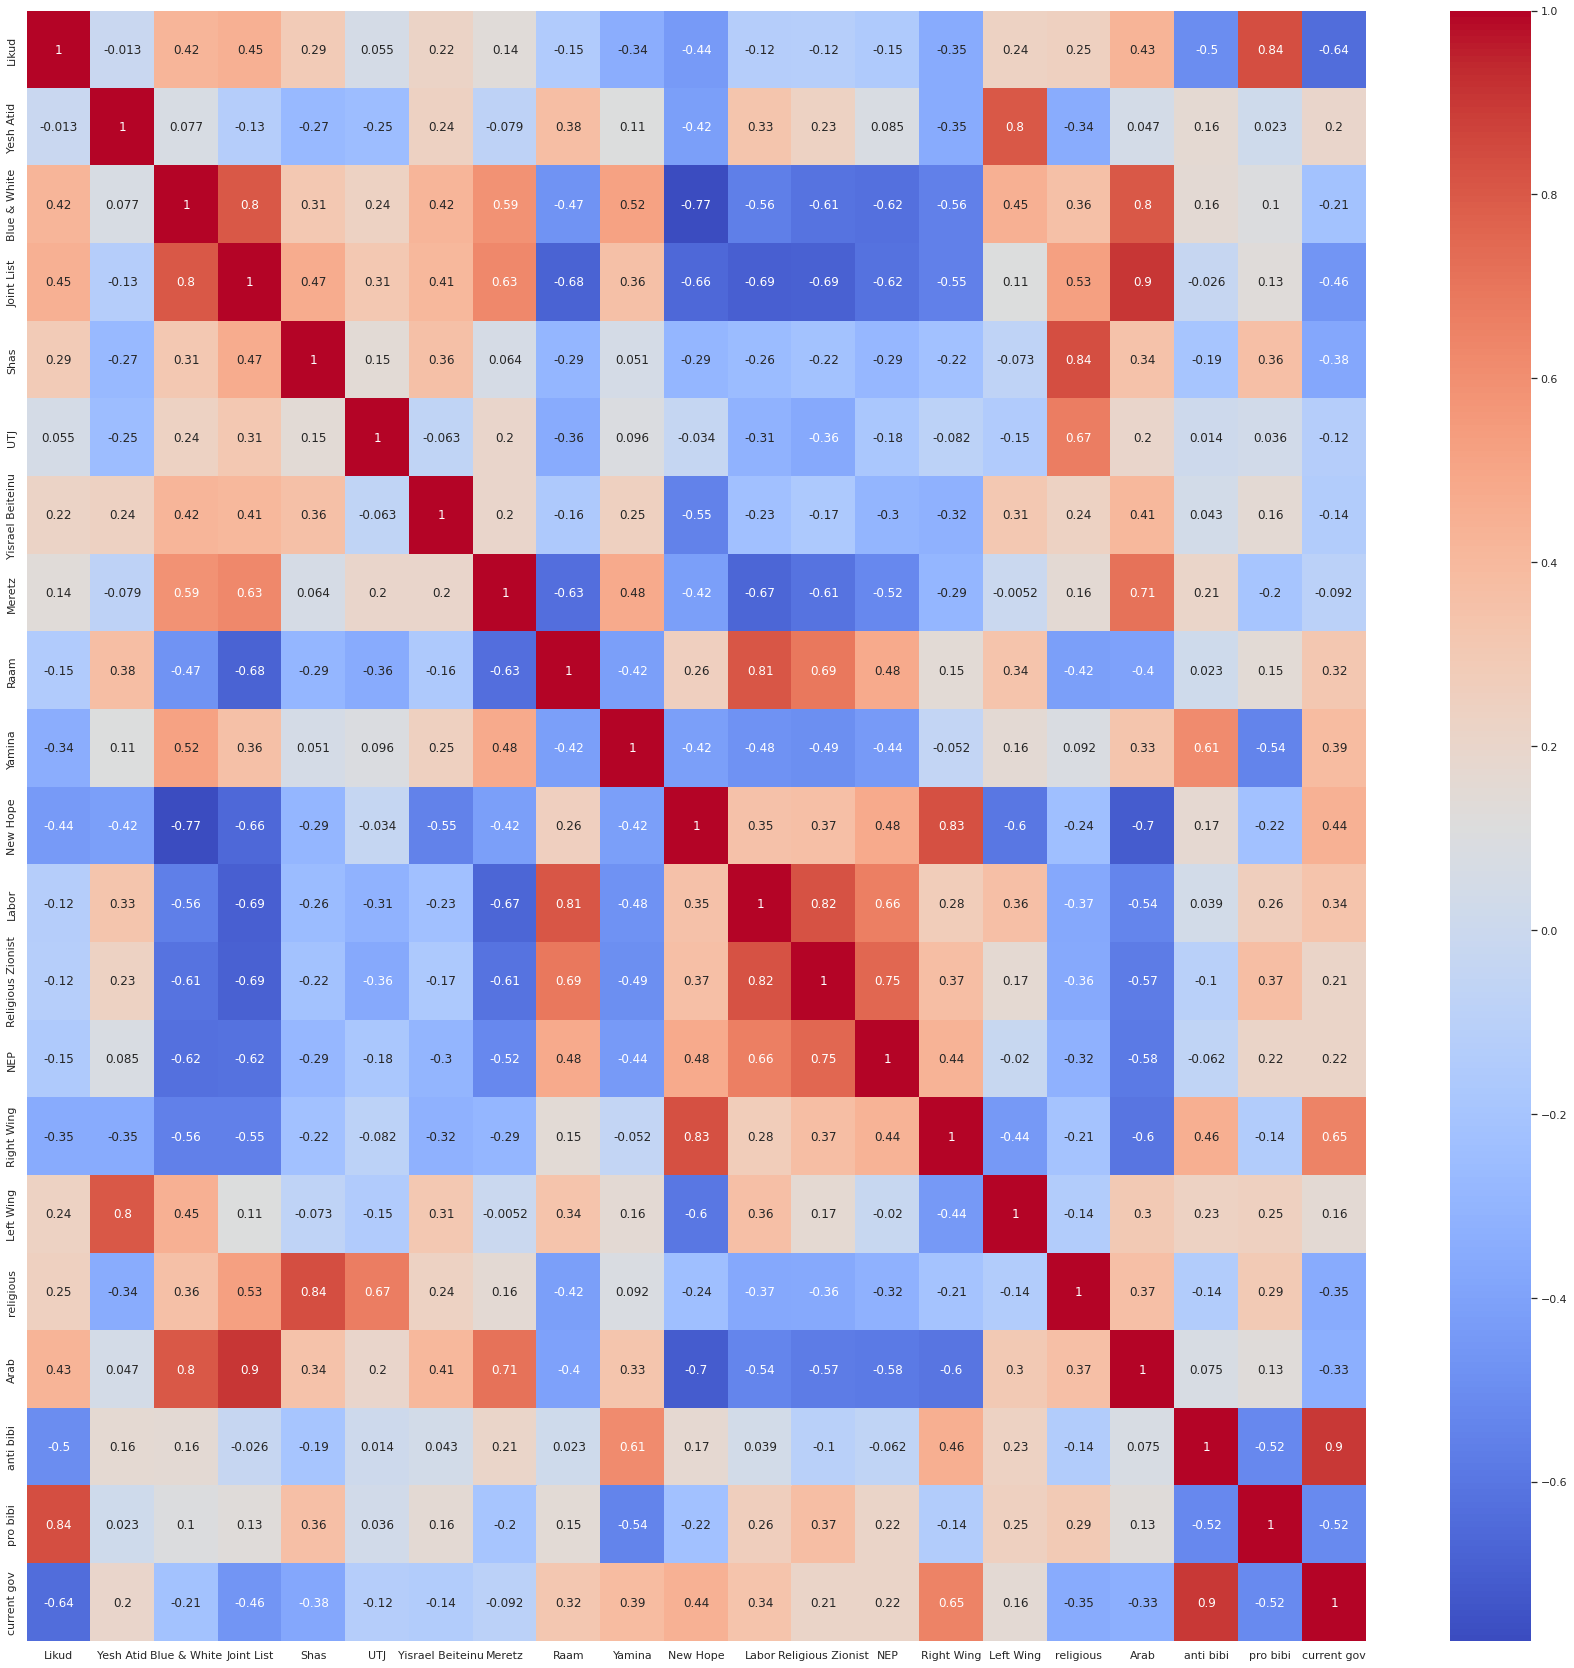

In [28]:
covariance = just_polls.drop('Days Before election', axis = 1).corr()
print("covariance")
# display(covariance)

heat_map = sea.heatmap(covariance,annot=True, cmap ="coolwarm")
# plt.figure(figsize = (30,15))
sea.set(rc = {'figure.figsize':(30,30)})
plt.show()

In [24]:
correlation_3_day = pd.read_excel(data, sheet_name=1, index_col=0)
display(correlation_3_day)

,Polling firm,Publisher,Poll Size,Margin of Error,Days Before election,Likud,Yesh Atid,Blue & White,Joint List,Shas,...,difference Raam,difference Yamina,difference New Hope,difference Labor,difference Religious Zionist,difference NEP,difference Right Wing,difference Left Wing,difference religious,difference Arab
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-23 00:00:00,Election results[5],NaN,NaN,0,0,30,17,8,6,9,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.0
2021-03-20 00:00:00,Smith,Mako[12],900,3.1,3,31,19,4,8,8,...,0.222222,-0.222222,0.111111,-0.111111,0.111111,0.44,-0.111111,0.0,-0.111111,0.0
2021-03-19 00:00:00,Camil Fuchs,Channel 13[7],1103,3.4,4,30,18,4,8,8,...,0.222222,0.444444,0.777778,0.555556,0.444444,-1.24,-0.111111,0.0,-0.111111,0.0
2021-03-19 00:00:00,Midgam/iPanel,Channel 12[8],1000,3.1,4,32,18,4,8,8,...,0.222222,-0.555556,-0.222222,0.555556,-0.555556,0.32,-0.111111,0.0,-0.111111,0.0
2021-03-19 00:00:00,Kantar,Kan 11[11],1406,2.6,4,31,19,4,8,8,...,0.222222,-0.555556,-0.222222,-0.444444,0.444444,0.44,-0.111111,0.0,-0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Direct Polls,1.017094,-0.404915,0.110897,-0.143162,0.472222,0.03312,0.629274,-0.564231,0.192265,-0.498932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Maagar Mohot,0.212862,-0.610205,0.362331,0.747585,0.209843,0.169082,-0.356582,0.080809,-0.157694,-0.829408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Geocartographia,-1,-0.25,1.25,0,-0.25,0.25,-0.75,0.75,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3 day rolling average

In [25]:
correlation_3_day = correlation_3_day.iloc[1:159, 25:35]
display(correlation_3_day)


,rolling blue & White,rolling Joint List,rolling Shas,rolling UTJ,rolling Yisrael Beiteinu,rolling Meretz,rolling Raam,rolling Yamina,rolling New Hope,rolling Labor
Date,,,,,,,,,,
2021-03-20,4.444444,8.111111,8.222222,6.888889,7.333333,4.111111,3.777778,9.222222,8.888889,5.111111
2021-03-19,4.444444,8.111111,8.222222,6.888889,7.333333,4.111111,3.777778,9.555556,9.222222,5.444444
2021-03-19,4.444444,8.111111,8.222222,6.888889,7.333333,4.111111,3.777778,9.555556,9.222222,5.444444
2021-03-19,4.444444,8.111111,8.222222,6.888889,7.333333,4.111111,3.777778,9.555556,9.222222,5.444444
2021-03-18,4.444444,8.111111,7.888889,6.888889,7.444444,4.111111,3.777778,10.111111,9.444444,5.222222
...,...,...,...,...,...,...,...,...,...,...
2020-06-17,10.500000,16.000000,9.500000,7.000000,8.000000,5.500000,0.000000,7.500000,0.000000,2.040000
2020-06-17,10.500000,16.000000,9.500000,7.000000,8.000000,5.500000,0.000000,7.500000,0.000000,2.040000
2020-06-11,12.500000,15.000000,9.000000,7.500000,8.000000,5.500000,0.000000,7.000000,0.000000,1.140000


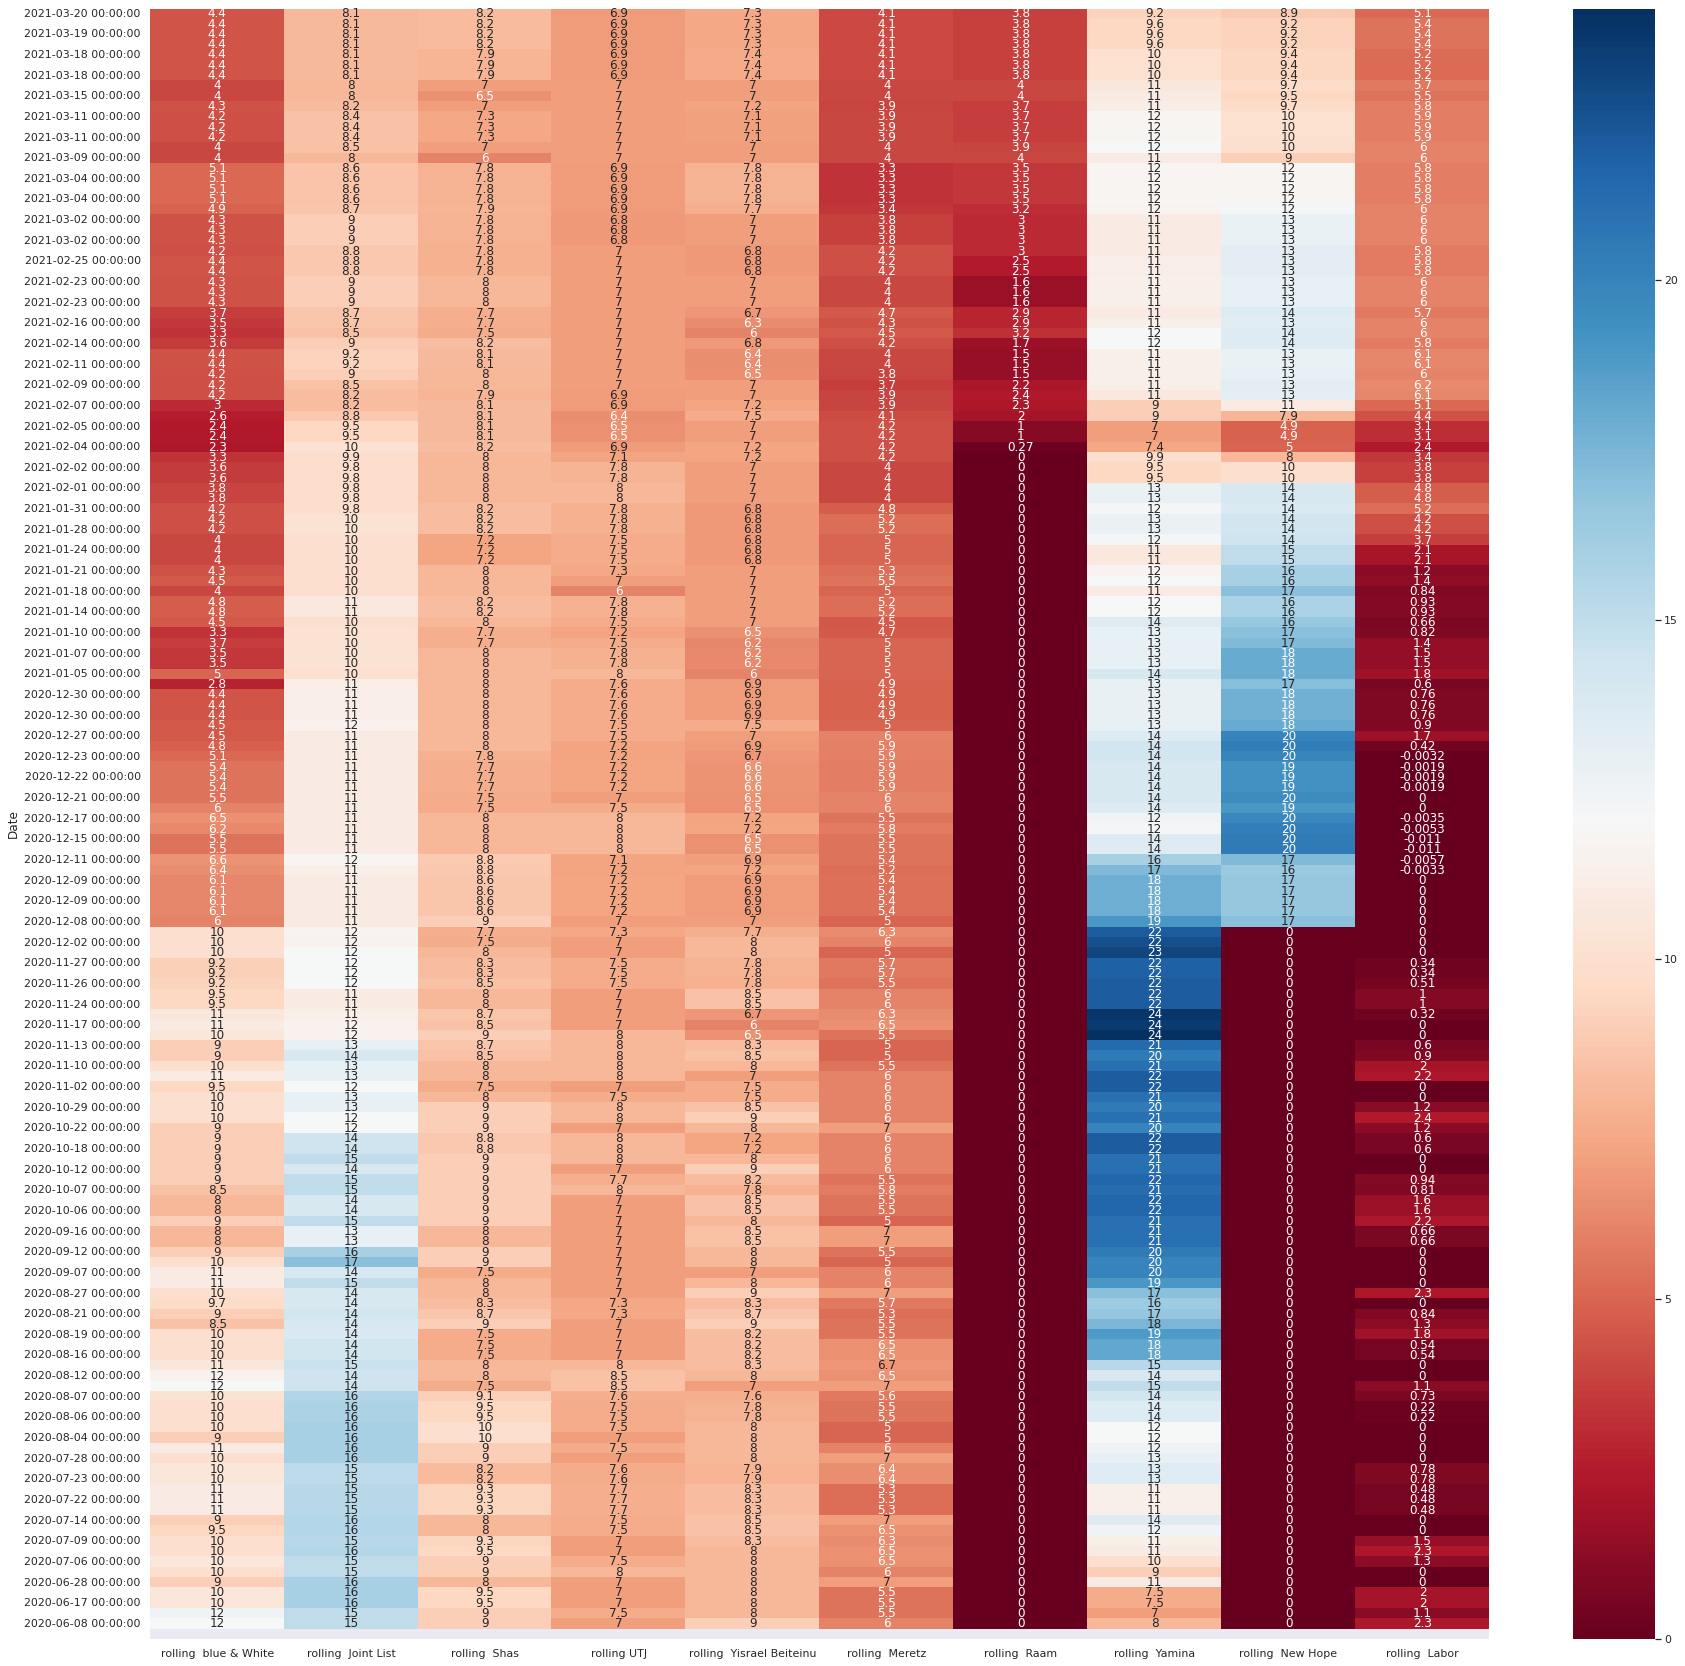

ValueError: ignored

In [27]:
correlation_3_poll = pd.read_excel(data, sheet_name=2, index_col=0)
correlation_3_poll = correlation_3_poll.iloc[444:454, 1:19]

sea.set(rc = {'figure.figsize':(30,30)})
heat_map2 = sea.heatmap(correlation_3_day, annot=True, cmap = "RdBu");
plt.show()
heat_map3 = sea.heatmap(correlation_3_poll, annot=True, cmap = "RdBu");
plt.show()
# temp = just_polls[1:1, 1:1]
# start, stop =1;
stm.nonparametric.lowess()


